# NetworkX, Soft landing

Lets run some imports

In [1]:
# %matplotlib notebook

# Base libraries
import pandas as pd
import networkx as nx

# Community Algorithms
import networkx.algorithms.community as nxcom
from networkx.algorithms import bipartite

# Plotting
from matplotlib import pyplot as plt

# get reproducible results
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

from utils import *

# Graphs creation
## 1. Create a Graph object
## 2. Start adding nodes

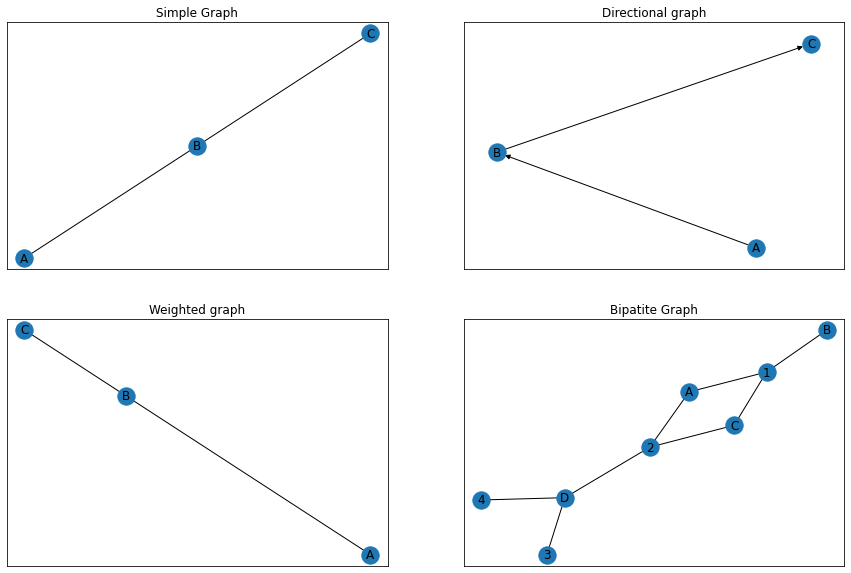

In [2]:
# Simple graph
simple_G = nx.Graph()
simple_G.add_edge('A','B')
simple_G.add_edge('B','C')

# Directional graph
digraph_G = nx.DiGraph()
digraph_G.add_edge('A','B')
digraph_G.add_edge('B','C')

# Weighted graph
weight_G = nx.Graph()
weight_G.add_edge('A','B', weight=6)
weight_G.add_edge('B','C', weight=60)

# Bipatite Graph
bipatite_G = nx.Graph() # no seperate class for bipartite

# Declare  nodes
bipatite_G.add_nodes_from(['A', 'B', 'C', 'D'], bipartite = 0) 
bipatite_G.add_nodes_from([1, 2, 3, 4], bipartite = 1)

# Build egdes
bipatite_G.add_edges_from([('A', 1),
                  ('A', 2),
                  ('B', 1),
                  ('C', 1),
                  ('C', 2),
                  ('D', 4),
                  ('D', 3),
                  ('D', 2)])

# Draw the graph's
G = nx.grid_2d_graph(2,2)  # 2*2 grid

simple_pos=nx.spring_layout(simple_G)
digraph_pos=nx.spring_layout(digraph_G)
weighted_pos=nx.spring_layout(weight_G)
bipartite_pos=nx.spring_layout(bipatite_G)

plt.rcParams.update({'figure.figsize': (15, 10)})

plt.subplot(221)
nx.draw_networkx(simple_G, simple_pos)
plt.title('Simple Graph')

plt.subplot(222)
nx.draw_networkx(digraph_G,digraph_pos)
plt.title('Directional graph')

plt.subplot(223)
nx.draw_networkx(weight_G,weighted_pos)
plt.title('Weighted graph')

plt.subplot(224)
nx.draw_networkx(bipatite_G,bipartite_pos)
plt.title('Bipatite Graph');

In [3]:
# We can overload attributes to an edge

# Append / Modify / Access to Node or attributes using python Dictionary convention

G = nx.Graph()
G.add_edge('A','B', stam=6, whatever = 'sababa')

print("G['B'] :", G['B'])
print("G['A']['B'] :",G['A']['B'])

# Notes
# -----
# Adding an edge that already exists updates the edge data.

# Many NetworkX algorithms designed for weighted graphs use
# an edge attribute (by default `weight`) to hold a numerical value.

G['B'] : {'A': {'stam': 6, 'whatever': 'sababa'}}
G['A']['B'] : {'stam': 6, 'whatever': 'sababa'}


# Network Analyze

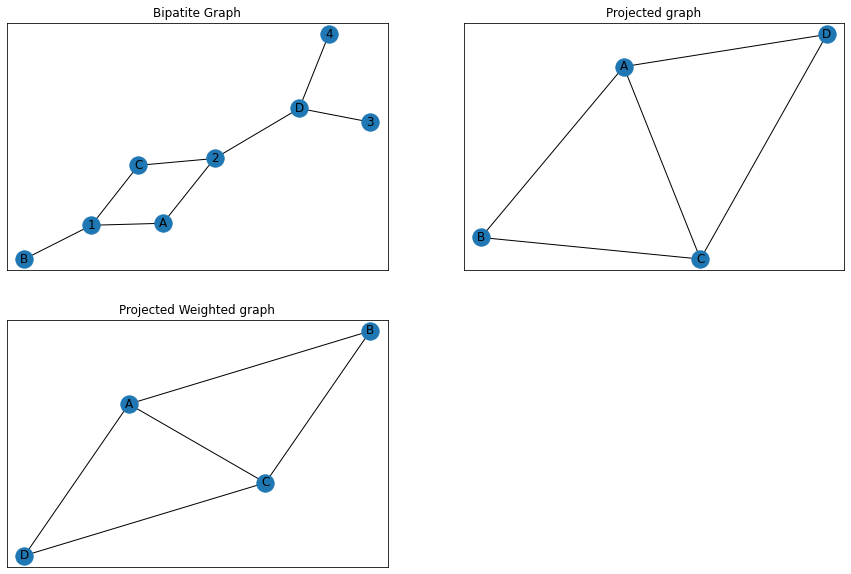

In [4]:
# Projected graph

# Select set to test for
X = set(['A', 'B', 'C','D'])
L = bipartite.projected_graph(bipatite_G, X)
L_weighted = bipartite.weighted_projected_graph(bipatite_G, X)

# Draw the graph
G = nx.grid_2d_graph(3,1)  # 2*2 grid
bipartite_pos = nx.spring_layout(bipatite_G)
projected_pos = nx.spring_layout(L)
projected_weighted_pos = nx.spring_layout(L_weighted)

plt.rcParams.update({'figure.figsize': (15, 10)})
plt.subplot(221)
nx.draw_networkx(bipatite_G, bipartite_pos)
plt.title('Bipatite Graph');

plt.subplot(222)
nx.draw_networkx(L, projected_pos)
plt.title('Projected graph');

plt.subplot(223)
nx.draw_networkx(L_weighted, projected_weighted_pos)
plt.title('Projected Weighted graph');


# Local clustering coeffiecient

,source,target
0,0,1
1,0,2
2,0,4
3,0,8
4,1,3
5,1,6
6,2,5
7,2,6
8,4,3
9,4,5


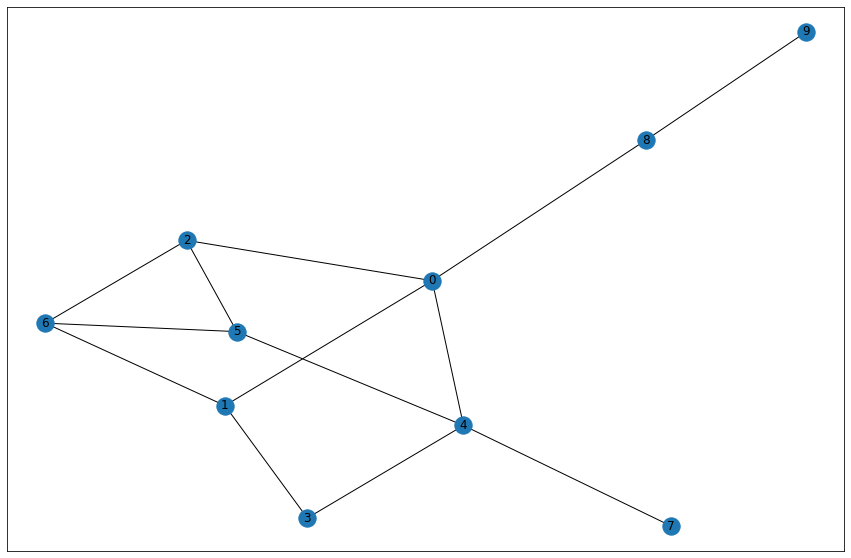

In [5]:
# Load a network from file

G = nx.read_adjlist('adjacency_list.txt', nodetype=int)

# Draw the network
nx.draw_networkx(G)
nx.to_pandas_edgelist(G)

In [6]:
# local clustering coefficient
# Give node V, the precentege of nodes connected to V,
# which are connected to at least one node connected to V.

print('Node 2 clustering: ', nx.clustering(G,2))
print('Average clustering: ', nx.average_clustering(G))

Node 2 clustering:  0.3333333333333333
Average clustering:  0.1


# network statistics

In [7]:
# Genral info

print("General info:", nx.info(G),'\n')

# The center of the network
# Peripherial nodes

print ('Network center: ', nx.center(G),'\n')
print ('Network peripherial nodes: ', nx.periphery(G),'\n')

# Network Diameter
# Maximum distance between two nodes
print ('Network Diameter', nx.diameter(G), '\n')

# Is the network fully conncted?
print ('Is network fully connected', nx.is_connected(G), '\n')

# Network density
# Edges / (Nodes*(Nodes-1))
print ('Network density', nx.density(G), '\n')

# Check for a single division of the network
# All the arches connect diffrets nodes groups

print('Bipatite sets: ', bipartite.sets(bipatite_G))

General info: Name: 
Type: Graph
Number of nodes: 10
Number of edges: 13
Average degree:   2.6000 

Network center:  [0] 

Network peripherial nodes:  [3, 6, 5, 7, 9] 

Network Diameter 4 

Is network fully connected True 

Network density 0.28888888888888886 

Bipatite sets:  ({'B', 'C', 'A', 'D'}, {1, 2, 3, 4})


# To the cool stuff...

## Say we want to build an "Waze" app with one line of code?

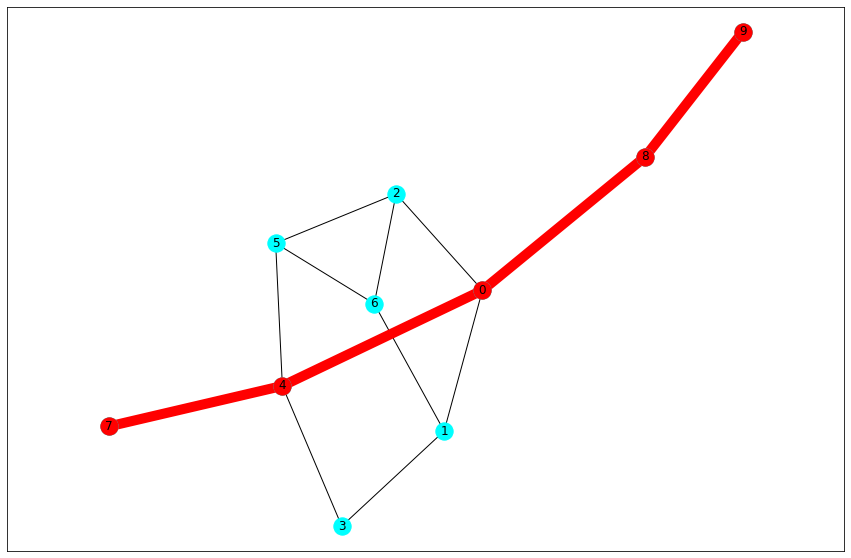

Shortest path from 7 to 9:  [7, 4, 0, 8, 9] 

All path from 7 to 9: 


[[7, 4, 0, 8, 9],
 [7, 4, 3, 1, 0, 8, 9],
 [7, 4, 3, 1, 6, 2, 0, 8, 9],
 [7, 4, 3, 1, 6, 5, 2, 0, 8, 9],
 [7, 4, 5, 2, 0, 8, 9],
 [7, 4, 5, 2, 6, 1, 0, 8, 9],
 [7, 4, 5, 6, 1, 0, 8, 9],
 [7, 4, 5, 6, 2, 0, 8, 9]]

In [8]:
# Shortest path from a to b

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,node_color='cyan')
# draw path in red
path = nx.shortest_path(G,source=7,target=9)
path_edges = list(zip(path,path[1:]))
nx.draw_networkx_nodes(G,pos,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,pos,edgelist=path_edges,edge_color='r',width=10)
plt.axis('equal')
plt.show()

# All the paths from a to b
# For a weighted graph the calculation sums the weights between the nodes

# Tip
# method : string, optional (default = 'dijkstra')
#         The algorithm to use to compute the path.
#         Supported options: 'dijkstra', 'bellman-ford'.
print ('Shortest path from 7 to 9: ', nx.shortest_path(G,7,9), '\n')

print ('All path from 7 to 9: ')
sorted(nx.all_simple_paths(G,7,9))

## COMMUNITY DETECTION 

The barbell graph has 2 communities.


[[0, 1, 2, 3, 4], [5], [6, 7, 8, 9, 10]]

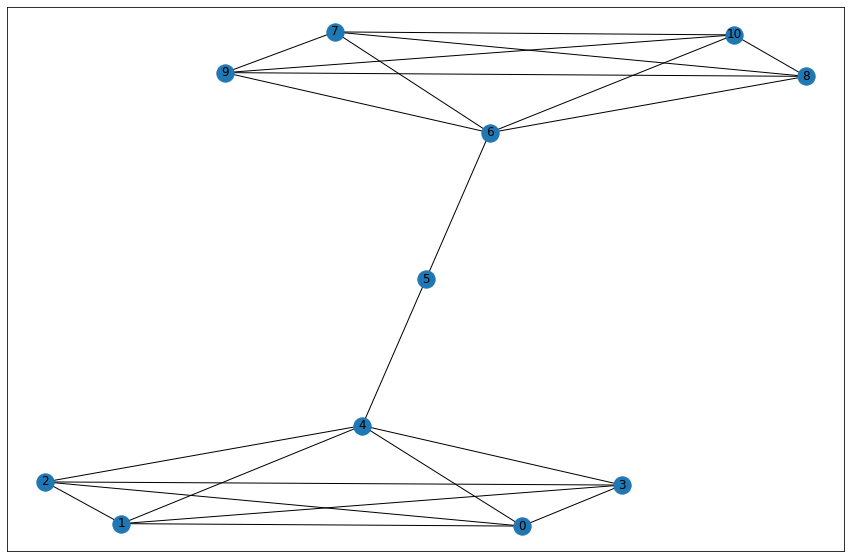

In [9]:
# The barbell Example

barbel_G = nx.barbell_graph(5, 1)
communities_generator = nx.community.girvan_newman(barbel_G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
nx.draw_networkx(barbel_G)

# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(barbel_G), key=len, reverse=True)
# Count the communities
print(f"The barbell graph has {len(communities)} communities.")
sorted(map(sorted, next_level_communities))

The karate club has 3 communities.


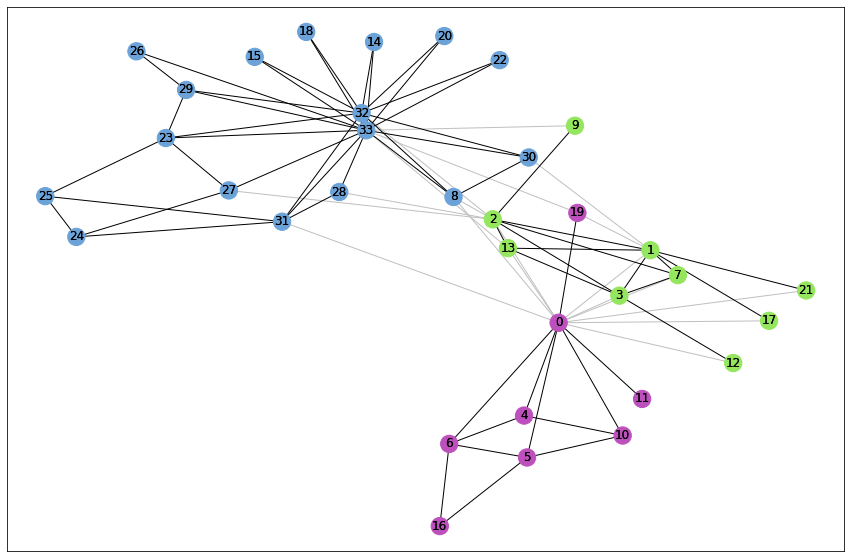

In [10]:
# The unavoidable karate club example

# Find communities in graph using Clauset-Newman-Moore greedy modularity
# maximization. This method currently supports the Graph class and does not
# consider edge weights.

# Greedy modularity maximization begins with each node in its own community
# and joins the pair of communities that most increases modularity until no
# such pair exists.
    
    
karate_G = nx.karate_club_graph()
# Find the communities
karate_communities = sorted(nxcom.greedy_modularity_communities(karate_G), key=len, reverse=True)
# Count the communities
print(f"The karate club has {len(karate_communities)} communities.")

# Set node and edge communities
set_node_community(karate_G, karate_communities)
set_edge_community(karate_G)

node_color = [get_color(karate_G.nodes[v]['community']) for v in karate_G.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in karate_G.edges if karate_G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in karate_G.edges if karate_G.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

karate_pos = nx.spring_layout(karate_G)

plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(
    karate_G,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(
    karate_G,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

plt.show()

# A larger example
We’ll use the dataset from SNAP; J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012.
http://snap.stanford.edu/data/ego-Facebook.html

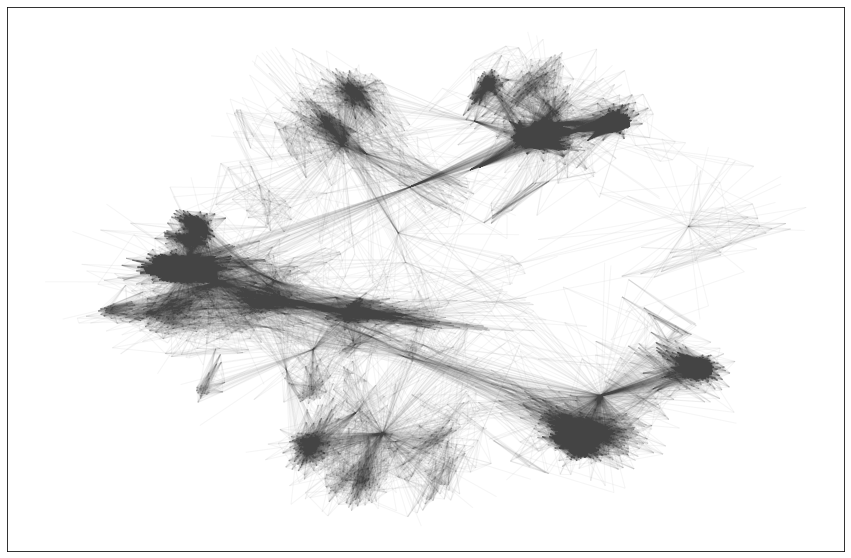

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4023,4034
88230,4023,4038
88231,4026,4030
88232,4027,4032


In [11]:
# Read the facebook edgelist file
social_G = nx.read_edgelist('./facebook_combined.txt')

# Draw the graph
social_pos = nx.spring_layout(social_G, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    social_G, 
    pos=social_pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)
plt.show()

# Pandas snapshot
nx.to_pandas_edgelist(social_G)

Facebook graph has 13 communities.


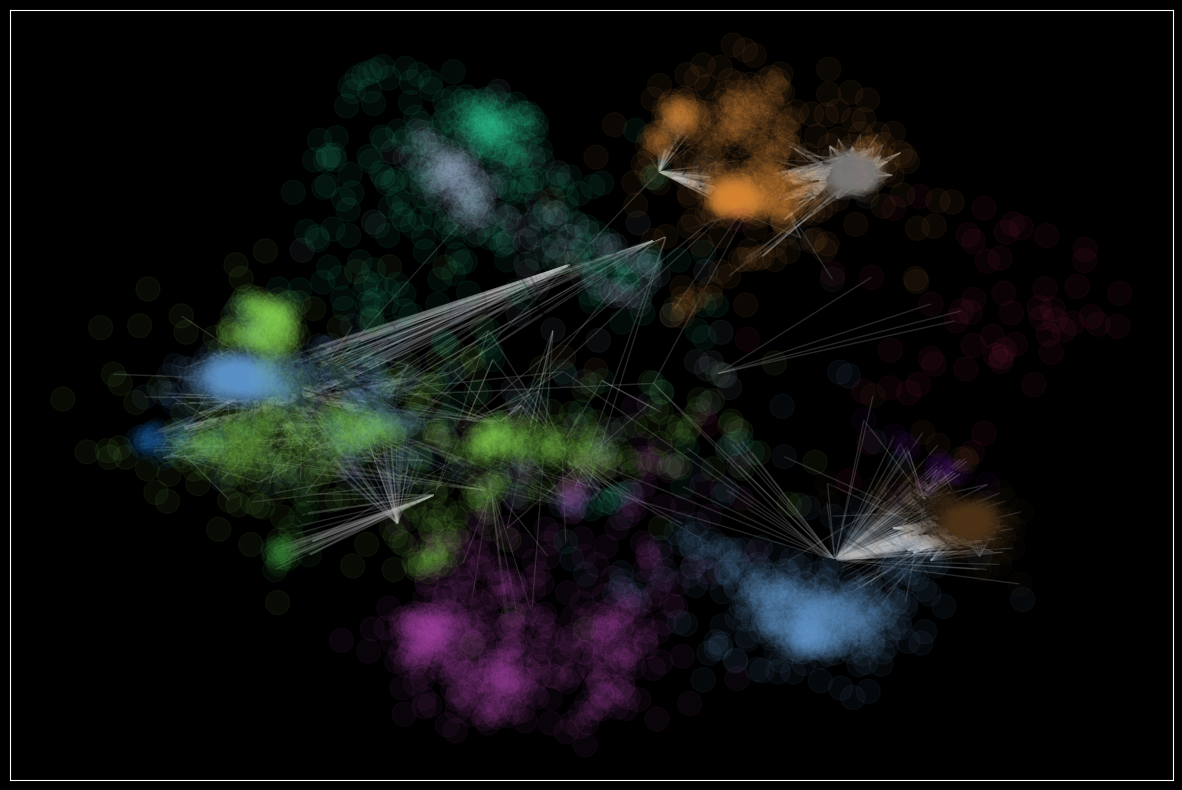

In [12]:
# Same as before

social_communities = sorted(nxcom.greedy_modularity_communities(social_G), key=len, reverse=True)
print (f'Facebook graph has {len(social_communities)} communities.')

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(social_G, social_communities)
set_edge_community(social_G)

# Set community color for internal edges
external = [(v, w) for v, w in social_G.edges if social_G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in social_G.edges if social_G.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(social_G.nodes[v]['community']) for v in social_G.nodes]
# external edges

# Draw the graph
nx.draw_networkx(
    social_G, 
    pos=social_pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    social_G,
    pos=social_pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

plt.show()

# Girvan-Newman Community Detection
The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities.
Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely “between” communities.

Girvan-Newman found : 2 communities.


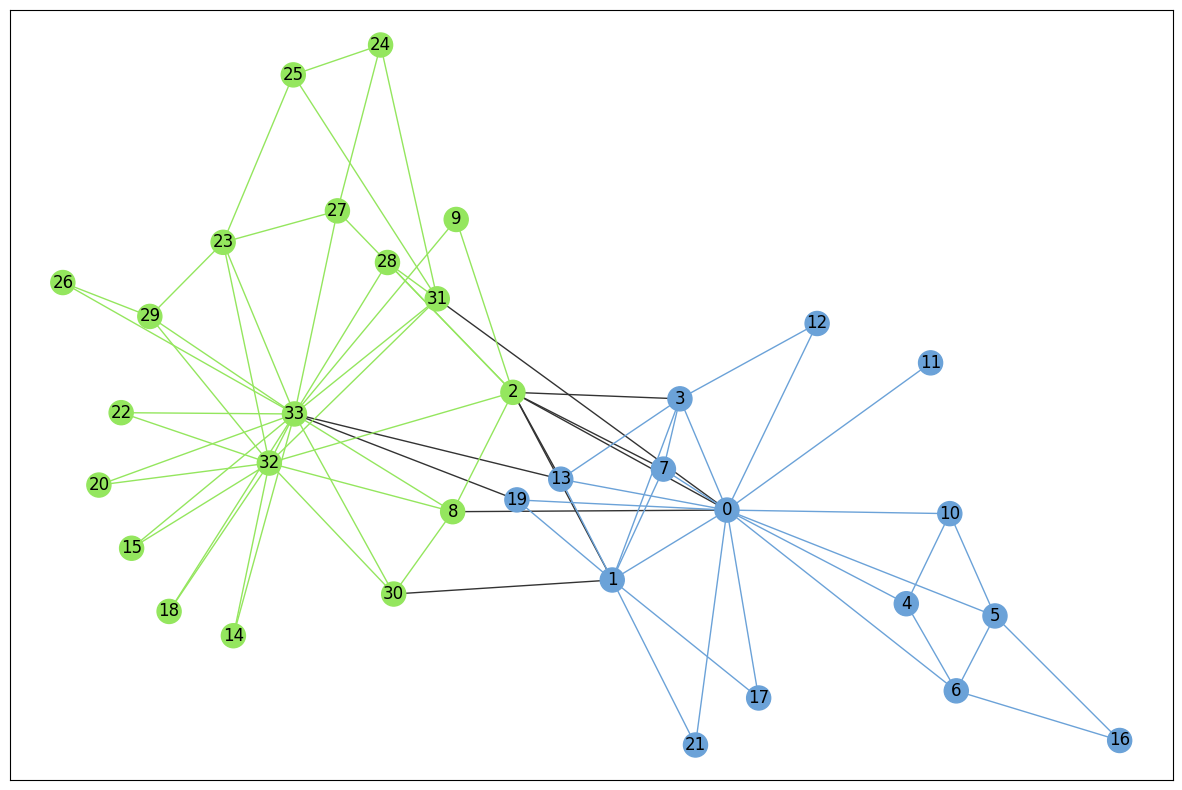

In [13]:
result = nxcom.girvan_newman(karate_G)
GN_communities = next(result)
print (f'Girvan-Newman found : {len(GN_communities)} communities.')

# Draw the graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Set node and edge communities
set_node_community(karate_G, GN_communities)
set_edge_community(karate_G)

# Set community color for nodes
node_color = [get_color(karate_G.nodes[v]['community']) for v in karate_G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in karate_G.edges if karate_G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in karate_G.edges if karate_G.edges[v, w]['community'] > 0]
internal_color = [get_color(karate_G.edges[e]['community']) for e in internal]

karate_pos = nx.spring_layout(karate_G)
# Draw external edges
nx.draw_networkx(
    karate_G, pos=karate_pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw nodes and internal edges
nx.draw_networkx(
    karate_G, pos=karate_pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color)
plt.show()

# Cliques
A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete. Cliques are in a way tight communities where every nodes is connected to every other. Let’s look at the largest clique in the karate club:

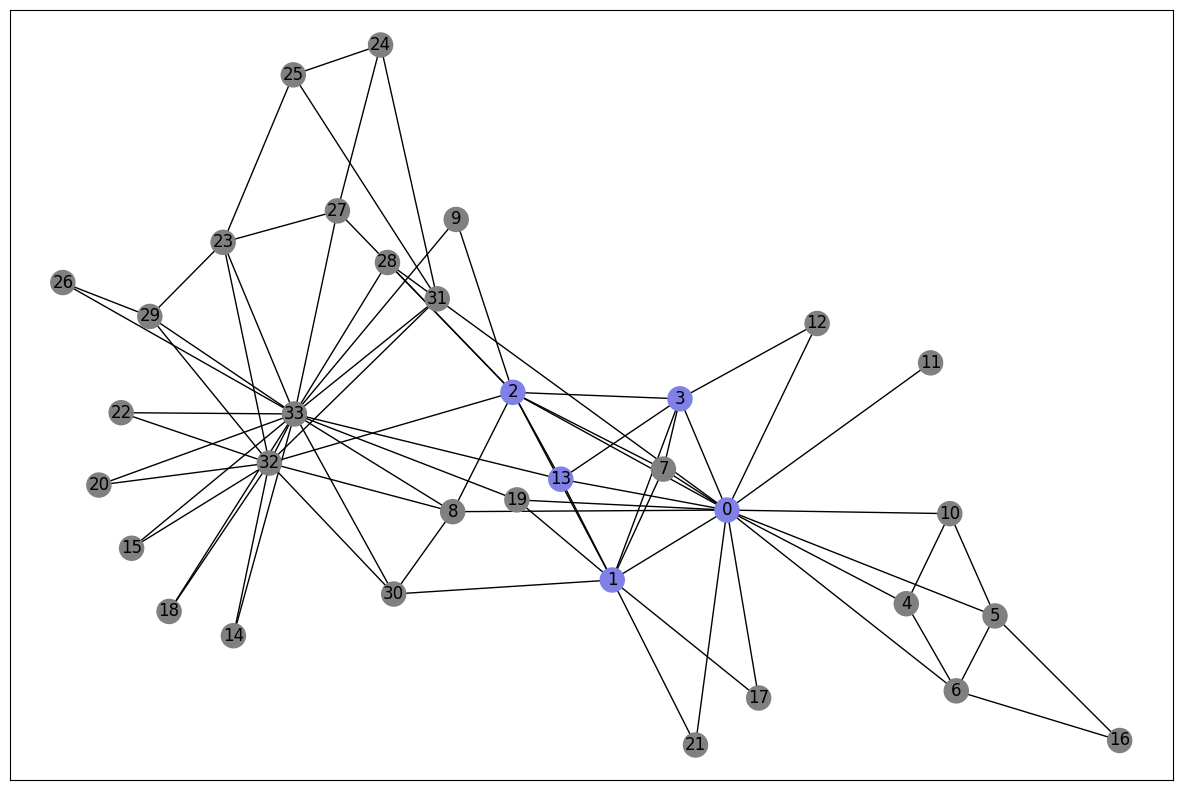

In [14]:

# Draw the graph
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
karate_Cliques = list(nx.find_cliques(karate_G))
max_clique = max(karate_Cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in karate_G.nodes()]
for i, v in enumerate(karate_G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(karate_G, node_color=node_color, pos=karate_pos)
plt.show()

# K-Cores
A k-core of a graph G is a maximal connected subgraph of G in which all vertices have degree at least k. Equivalently, it is one of the connected components of the subgraph of G formed by repeatedly deleting all vertices of degree less than k. If a non-empty k-core exists, then, clearly, G has degeneracy at least k, and the degeneracy of G is the largest k for which G has a k-core.

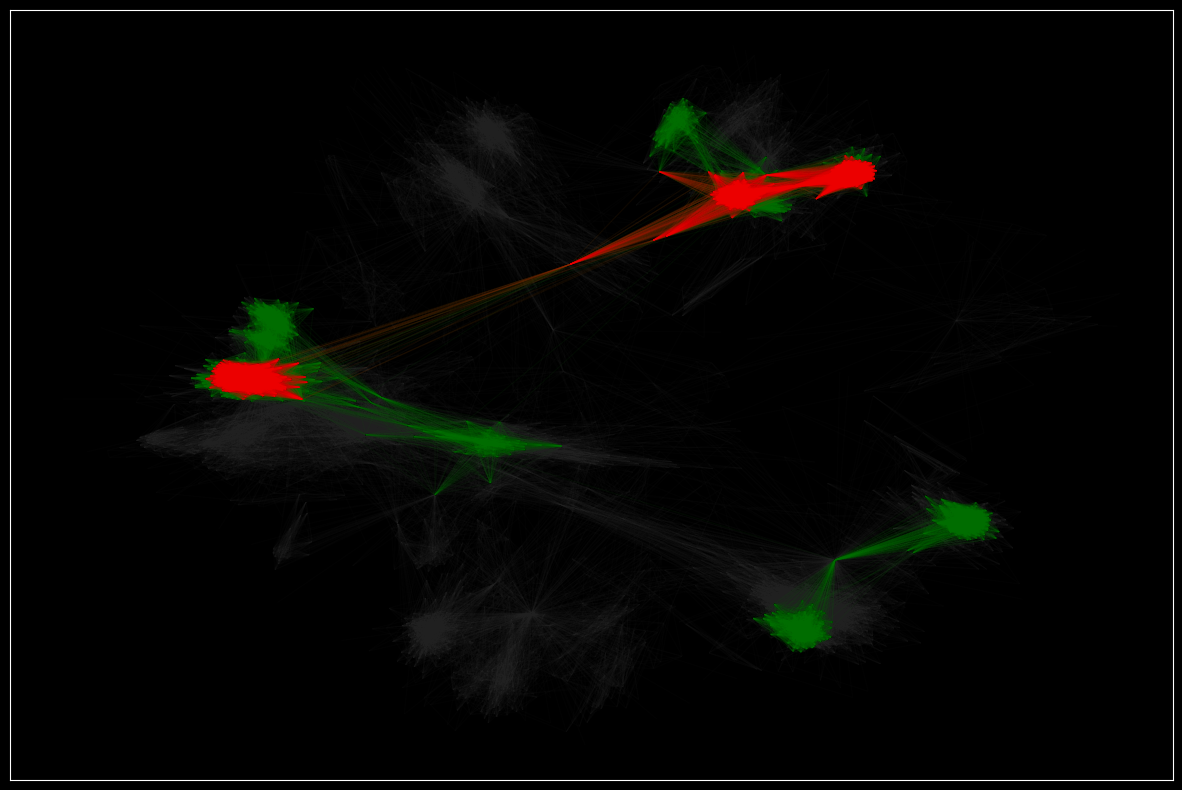

In [15]:
# cores with at lest degree 30
G_core_30 = nx.k_core(social_G, 30)
# similarly, with at least degree 60
G_core_60 = nx.k_core(social_G, 60)


# Visualize network and k-cores

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')
pos = nx.spring_layout(social_G, k=0.1)
nx.draw_networkx(
    social_G, pos=social_pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=social_pos, node_size=0, edge_color="green", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=social_pos, node_size=0, edge_color="red", alpha=0.05, with_labels=False)
plt.show()